In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud ,STOPWORDS
from PIL import Image
train = pd.read_csv('C:/Users/user/Desktop/Group_Project/train.csv')
train.head()

,id,target,comment_text,severe_toxicity,obscene,identity_attack,insult,threat,asian,atheist,...,article_id,rating,funny,wow,sad,likes,disagree,sexual_explicit,identity_annotator_count,toxicity_annotator_count
0,59848,0.000000,"This is so cool. It's like, 'would you want yo...",0.000000,0.0,0.000000,0.00000,0.0,NaN,NaN,...,2006,rejected,0,0,0,0,0,0.0,0,4
1,59849,0.000000,Thank you!! This would make my life a lot less...,0.000000,0.0,0.000000,0.00000,0.0,NaN,NaN,...,2006,rejected,0,0,0,0,0,0.0,0,4
2,59852,0.000000,This is such an urgent design problem; kudos t...,0.000000,0.0,0.000000,0.00000,0.0,NaN,NaN,...,2006,rejected,0,0,0,0,0,0.0,0,4
3,59855,0.000000,Is this something I'll be able to install on m...,0.000000,0.0,0.000000,0.00000,0.0,NaN,NaN,...,2006,rejected,0,0,0,0,0,0.0,0,4
4,59856,0.893617,haha you guys are a bunch of losers.,0.021277,0.0,0.021277,0.87234,0.0,0.0,0.0,...,2006,rejected,0,0,0,1,0,0.0,4,47


In [4]:
train.isnull().sum()

id                                           0
target                                       0
comment_text                                 0
severe_toxicity                              0
obscene                                      0
identity_attack                              0
insult                                       0
threat                                       0
asian                                  1399744
atheist                                1399744
bisexual                               1399744
black                                  1399744
buddhist                               1399744
christian                              1399744
female                                 1399744
heterosexual                           1399744
hindu                                  1399744
homosexual_gay_or_lesbian              1399744
intellectual_or_learning_disability    1399744
jewish                                 1399744
latino                                 1399744
male         

##Some features might have relations with Toxicity, like capitals letters in the text, punctuations in the texts. Add the new features into the training set.

In [6]:
# Add the new features into the training set. 
train['total_length'] = train['comment_text'].apply(len)
train['capitals'] = train['comment_text'].apply(lambda comment: sum(1 for c in comment if c.isupper()))
train['caps_vs_length'] = train.apply(lambda row: float(row['capitals'])/float(row['total_length']),axis=1)
train['num_exclamation_marks'] = train['comment_text'].apply(lambda comment: comment.count('!'))
train['num_question_marks'] = train['comment_text'].apply(lambda comment: comment.count('?'))
train['num_punctuation'] = train['comment_text'].apply(lambda comment: sum(comment.count(w) for w in '.,;:'))
train['num_symbols'] = train['comment_text'].apply(lambda comment: sum(comment.count(w) for w in '*&$%'))
train['num_words'] = train['comment_text'].apply(lambda comment: len(comment.split()))
train['num_unique_words'] = train['comment_text'].apply(lambda comment: len(set(w for w in comment.split())))
train['words_vs_unique'] = train['num_unique_words'] / train['num_words']
train['num_smilies'] = train['comment_text'].apply(lambda comment: sum(comment.count(w) for w in (':-)', ':)', ';-)', ';)')))

In [8]:
features = ('total_length', 'capitals', 'caps_vs_length', 'num_exclamation_marks','num_question_marks', 'num_punctuation', 'num_words', 'num_unique_words','words_vs_unique', 'num_smilies', 'num_symbols')
columns = ('target', 'severe_toxicity', 'obscene', 'identity_attack', 'insult', 'threat', 'funny', 'wow', 'sad', 'likes', 'disagree', 'sexual_explicit','identity_annotator_count', 'toxicity_annotator_count')
rows = [{c:train[f].corr(train[c]) for c in columns} for f in features]
train_correlations = pd.DataFrame(rows, index=features)

In [9]:
train_correlations

,disagree,funny,identity_annotator_count,identity_attack,insult,likes,obscene,sad,severe_toxicity,sexual_explicit,target,threat,toxicity_annotator_count,wow
total_length,0.017617,-0.084710,0.020840,0.053430,0.009085,0.060639,0.009823,-0.019940,0.007962,0.019882,0.006444,-0.013198,-0.030894,0.002572
capitals,0.003928,-0.039221,0.012405,0.050489,0.026358,0.018707,0.027995,-0.005448,0.025127,0.014144,0.026120,0.000721,-0.009082,0.009687
caps_vs_length,-0.021716,0.021263,-0.005510,-0.008477,-0.006029,-0.038470,0.017088,0.002848,0.010594,-0.003575,-0.005344,0.000822,0.015381,-0.000603
num_exclamation_marks,-0.009384,0.007073,0.000869,0.017085,0.052533,-0.007866,0.056108,0.005158,0.035388,0.019437,0.055152,0.021267,0.024115,0.002225
num_question_marks,-0.002180,-0.009290,0.006305,0.028554,0.014366,-0.002731,0.019233,0.002023,0.011662,0.015987,0.019308,-0.000430,-0.003307,0.001263
num_punctuation,0.001415,-0.057187,0.018050,0.042990,0.018911,0.029581,0.017701,-0.016511,0.013266,0.018985,0.016974,-0.006479,-0.021231,0.001959
num_words,0.016121,-0.084398,0.020595,0.050527,0.011975,0.059481,0.014536,-0.019412,0.009696,0.021525,0.009579,-0.009893,-0.029856,0.002714
num_unique_words,0.019634,-0.085764,0.020787,0.053659,0.019494,0.063874,0.017918,-0.018110,0.011900,0.022816,0.016702,-0.008946,-0.029814,0.003490
words_vs_unique,-0.020712,0.079045,-0.019749,-0.048941,0.001135,-0.060162,-0.003007,0.016223,-0.005329,-0.015748,0.001172,0.009367,0.027853,-0.004150
num_smilies,-0.010936,0.010109,-0.000576,-0.008337,-0.009401,-0.016607,-0.001024,-0.002133,-0.003877,-0.000414,-0.010040,-0.003190,-0.003030,-0.002777


In [10]:
train_correlations.to_csv('train_correlations.csv')

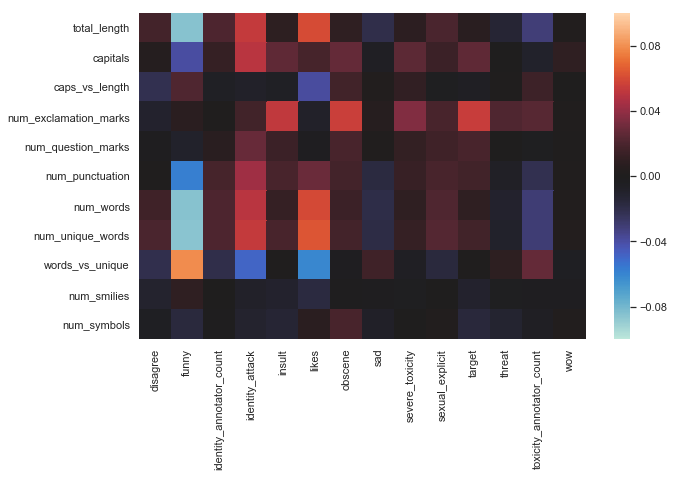

In [11]:
#Correlations between new features and targets in heatmap:
plt.figure(figsize=(10, 6))
sns.set(font_scale=1)
ax = sns.heatmap(train_correlations, vmin=-0.1, vmax=0.1, center=0.0)

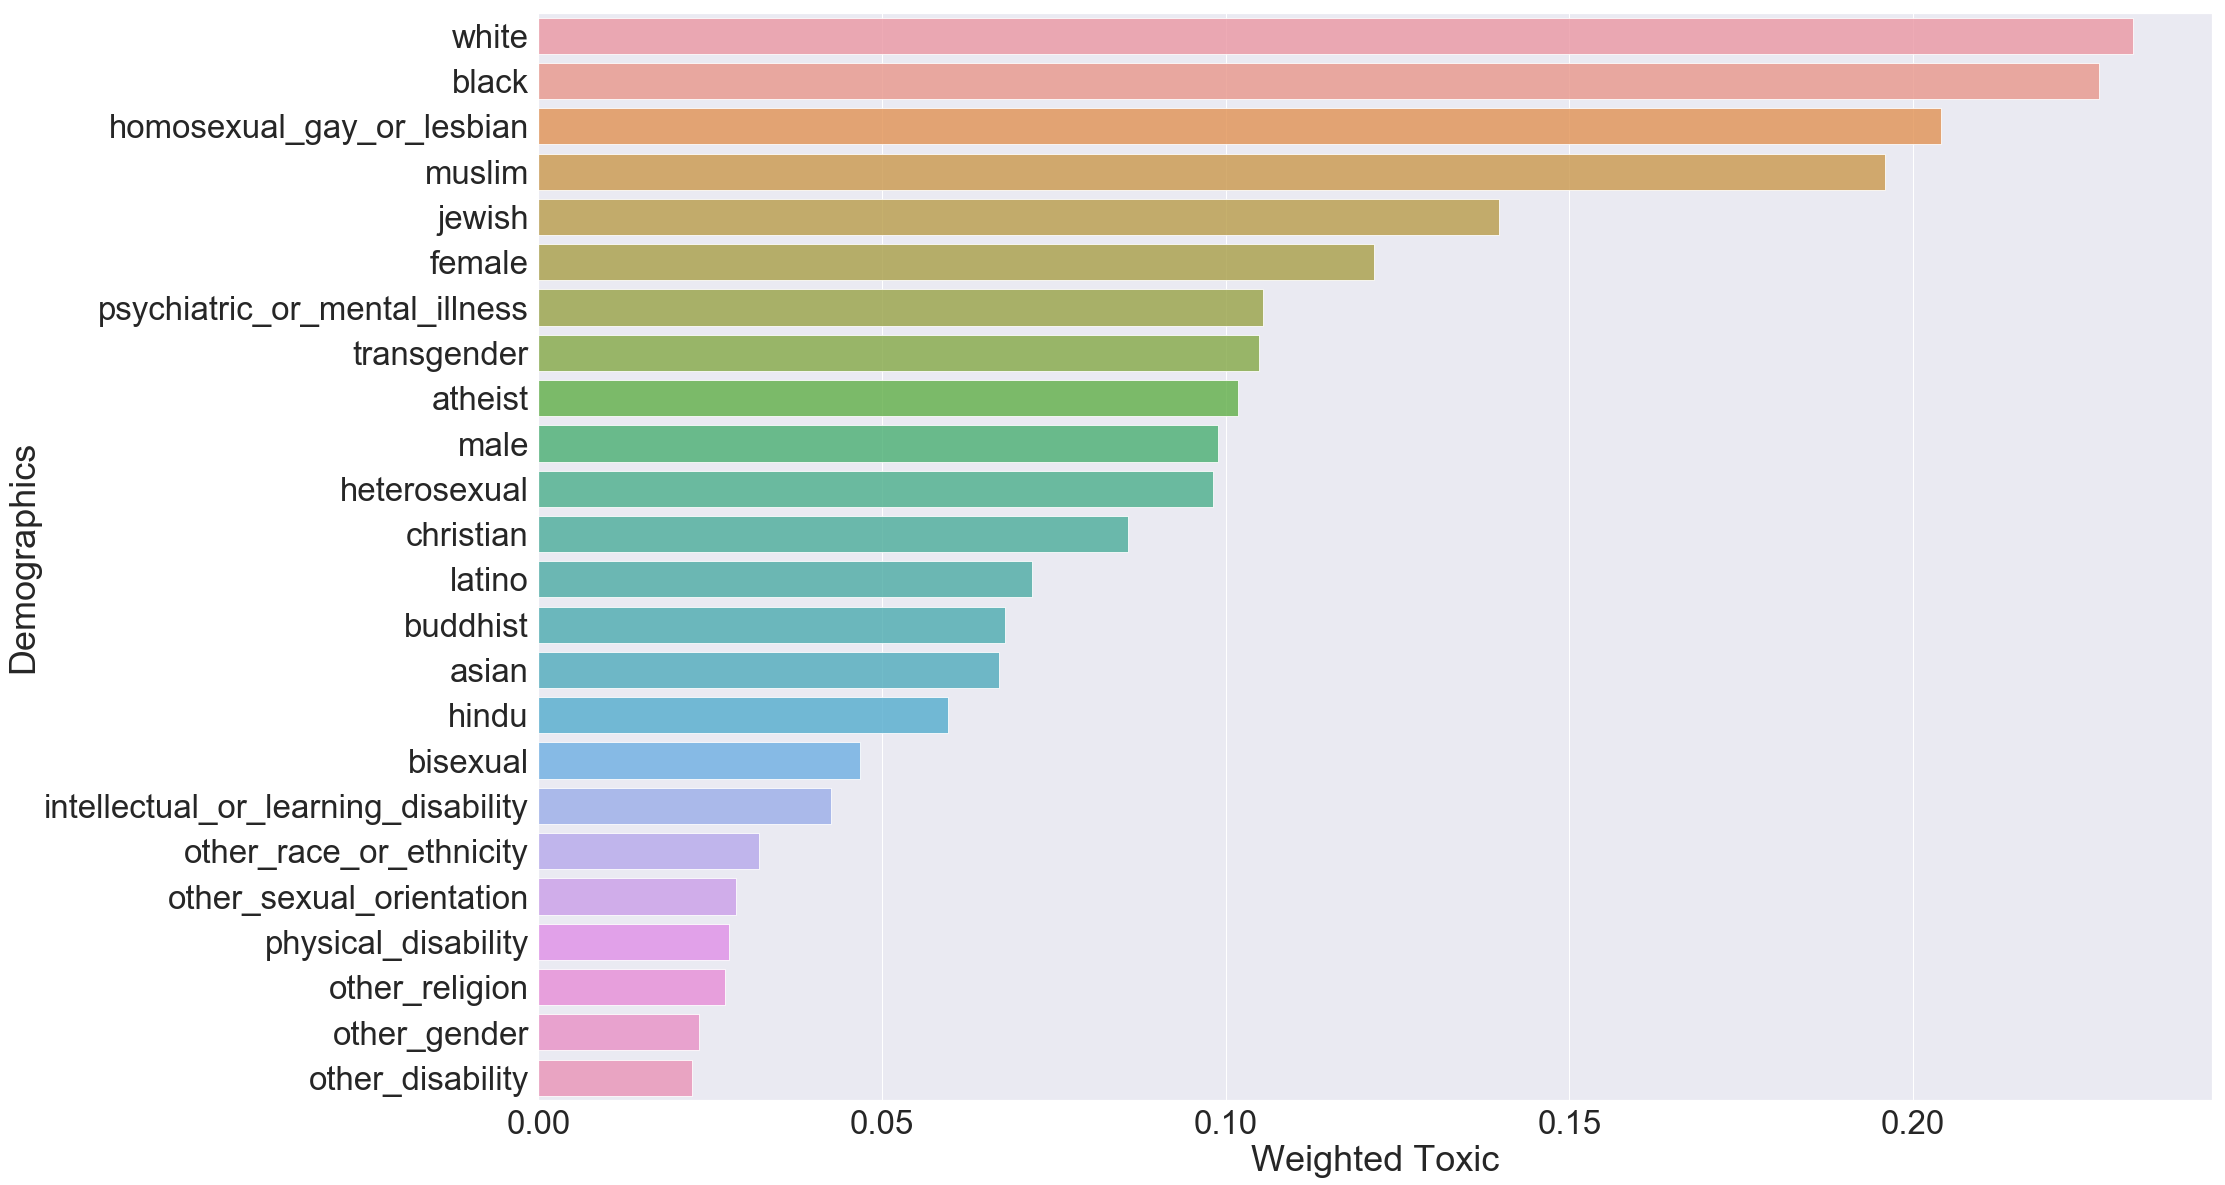

In [13]:
#Percent of toxic comments related to different identities, using target and popolation amount of each identity as weights:
demographics = train.loc[:, ['target']+list(train)[slice(8,32)]].dropna()
weighted_toxic = demographics.iloc[:, 1:].multiply(demographics.iloc[:, 0], axis="index").sum()/demographics.iloc[:, 1:][demographics.iloc[:, 1:]>0].count()
weighted_toxic = weighted_toxic.sort_values(ascending=False)
plt.figure(figsize=(30,20))
sns.set(font_scale=3)
ax = sns.barplot(x = weighted_toxic.values, y = weighted_toxic.index, alpha=0.8)
plt.ylabel('Demographics')
plt.xlabel('Weighted Toxic')
plt.show()

In [14]:
#Also,we can check the correlations between identities and the comment labels
identities = tuple(train.iloc[:, 8:32])
rows = [{c:train[f].corr(train[c]) for c in columns} for f in identities]
poptoxicity_correlations = pd.DataFrame(rows, index=identities)

In [15]:
poptoxicity_correlations

,disagree,funny,identity_annotator_count,identity_attack,insult,likes,obscene,sad,severe_toxicity,sexual_explicit,target,threat,toxicity_annotator_count,wow
asian,0.007868,-0.000409,0.021327,0.041203,-0.000664,-0.003144,-0.004047,0.001051,0.005371,-0.013710,0.007205,-0.002817,0.001216,0.010691
atheist,0.001031,-0.002847,0.023635,0.031167,0.005152,-0.002436,-0.000122,0.000051,0.005047,-0.004954,0.010625,0.000781,-0.000433,-0.002600
bisexual,-0.004104,-0.003230,0.015360,0.047476,0.006283,0.009078,0.005323,-0.002987,0.009279,0.024218,0.021057,-0.001796,-0.000380,-0.000367
black,-0.000631,-0.020852,0.018075,0.314422,0.098186,-0.012769,0.026267,0.004480,0.094418,-0.006407,0.167224,0.048630,0.035702,0.001483
buddhist,-0.001719,-0.002802,0.010600,0.024143,-0.002909,-0.000621,-0.001751,-0.001348,0.004260,-0.004397,0.004613,0.002542,-0.002119,-0.001222
christian,-0.020644,-0.008460,0.018038,0.093885,-0.030669,0.021608,-0.025650,-0.015212,-0.000874,0.008710,-0.006776,-0.014324,-0.015846,-0.013146
female,0.008464,-0.012743,0.009830,0.052299,0.037995,0.036137,0.036250,0.005052,0.032653,0.153735,0.062904,0.023384,0.007588,0.008052
heterosexual,-0.002821,-0.002225,0.010674,0.073282,0.012613,0.006148,0.008396,-0.001339,0.018239,0.066624,0.038193,-0.003600,0.003018,-0.001381
hindu,0.002689,-0.002369,0.014825,0.022695,-0.001895,0.002924,-0.002221,-0.001025,0.003839,-0.005251,0.003607,0.001549,-0.001248,-0.000161
homosexual_gay_or_lesbian,-0.002378,-0.003616,0.020577,0.249880,0.061920,0.012015,0.026097,0.003452,0.064122,0.099424,0.131110,0.016785,0.019139,-0.001935


In [16]:
poptoxicity_correlations.to_csv('poptoxicity_correlations.csv')

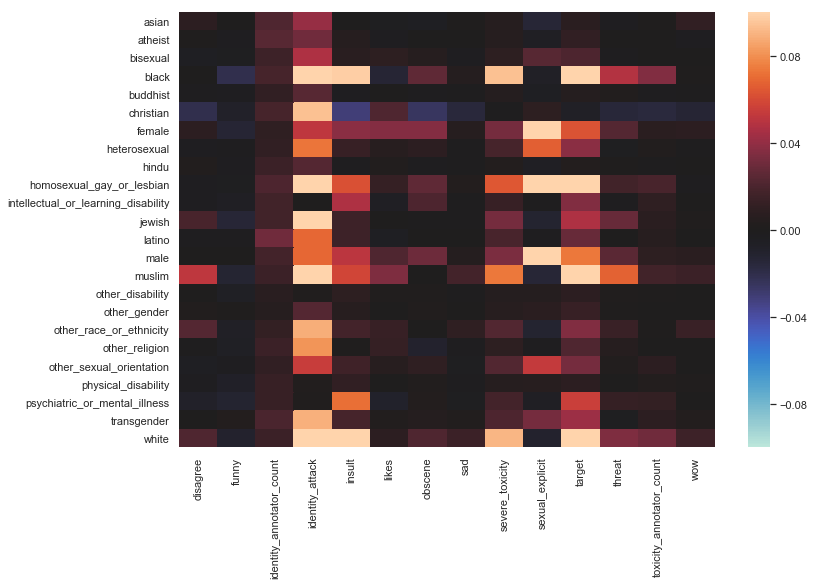

In [17]:
# Show Popular Correlations between new features and targets in heatmap
plt.figure(figsize=(12, 8))
sns.set(font_scale=1)
ax = sns.heatmap(poptoxicity_correlations, vmin=-0.1, vmax=0.1, center=0.0)